## Probability density function (PDF) and Cumulative distribution function (CDF)

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

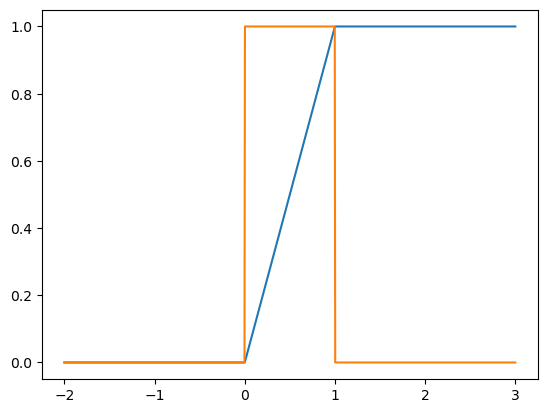

In [33]:
X = np.linspace(-2, 3, 1000)
uniform_cdf = np.where(X < 0.0, np.zeros_like(X), np.where(X <= 1.0, X, np.ones_like(X)))
plt.plot(X, uniform_cdf)
uniform_pdf = np.where((0.0 <= X) & (X <= 1.0), np.ones_like(X), np.zeros_like(X))
plt.plot(X, uniform_pdf)

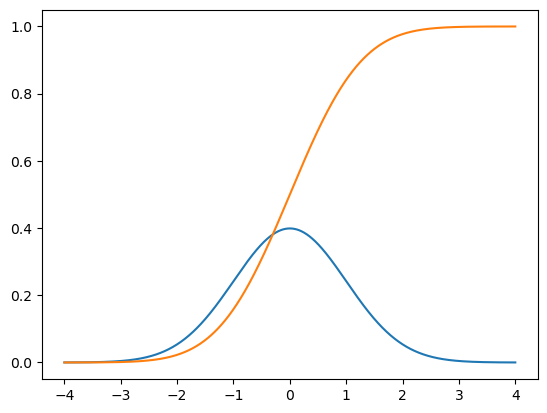

In [44]:
from scipy.special import erf

X = np.linspace(-4, 4, 1000)
mu = 0.0
std = 1.0

normal_pdf = np.exp(-(X-mu)**2/(2*std**2))/(np.sqrt(2*np.pi) * std)
plt.plot(X, normal_pdf)

normal_cdf = (1 + erf((X-mu)/(np.sqrt(2)/std)))/2
plt.plot(X, normal_cdf)
plt.show()

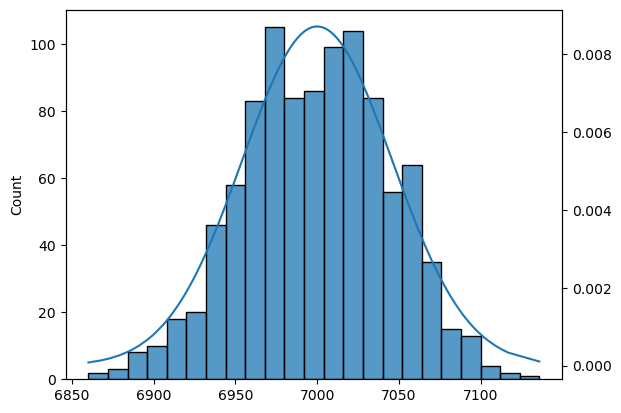

In [156]:
p = 0.7
n = 10000
num_points = 1000

# sample num_points binomials with n and p
data = np.random.binomial(n, p, (num_points,))

# when n is large a Binomial(n, p) approximates a normal random variable
# with mean mu = n*p and standard deviation std = sqrt(n*p*(1-p))
mu = p*n
std = np.sqrt(n*p * (1-p))

# using the sample, mu, and std, we can sample the normal distribution
normal_pdf = np.exp(-(data-mu)**2/(2*std**2))/(np.sqrt(2*np.pi) * std)

fig, ax = plt.subplots()

# binomial sample as histogram
sns.histplot(data, ax=ax)
ax2 = ax.twinx()
# normal based on sample 
sns.lineplot(x=data, y=normal_pdf, ax=ax2)
plt.show()